In [48]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import requests
import pandas as pd
import json
import numpy as np

In [49]:
player_id = 8475170

In [50]:
resp = requests.get("https://statsapi.web.nhl.com/api/v1/people/{}/stats?stats=gameLog".format(player_id))
data = resp.json()
#print(json.dumps(data['stats'][0]['splits'], indent=2))

In [51]:
splits = pd.read_json(json.dumps(data['stats'][0]['splits']))
games = pd.DataFrame(list(splits['game']))
gamePks = games['gamePk']
stats = pd.DataFrame(list(splits['stat']))
goals = stats['goals']
assists = stats['assists']
dates = splits['date']
df = pd.DataFrame(data={'gamePk': gamePks, 'goals': goals, 'assists': assists, 'date': dates})

In [52]:
df = df.sort_values(by='date')

In [53]:
df['csgoals'] = df['goals'].cumsum()

In [54]:
# Rearange indexes
#newIndexes = np.arange(0, df.shape[0])
#df.index = newIndexes

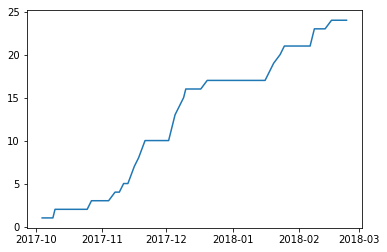

In [55]:
plt.plot(df['date'],df['csgoals'])